# Prediction of salary based on the number of years of experience

In [1]:
# All Libraries required for this lab are listed below.
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
#LOADING THE DATASET
df = pd.read_csv("Downloads/Salary.csv")

In [3]:
#GET FIRST FIVE ROW OF DATASET
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


# Understanding the dataset

In [5]:
df.dtypes

YearsExperience    float64
Salary               int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [9]:
df.shape

(35, 2)

In [10]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

# Exploratory Data Analysis
 

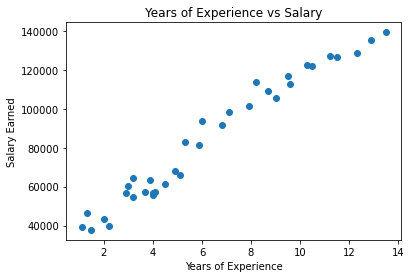

In [12]:
#using scatter plot
x=df[["YearsExperience"]]
y=df[["Salary"]]
plt.pyplot.scatter(x, y)
plt.pyplot.xlabel("Years of Experience")
plt.pyplot.ylabel("Salary Earned")
plt.pyplot.title("Years of Experience vs Salary")

plt.pyplot.show()

The graph shows that there is a positive linear relationship between Years of Experience and salary Earned. As the Years of Experience increase, the salary increased also.

# MODEL DEVELOPMENT

In [13]:
#PREPARING THE DATA
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [16]:
#TRAINING AND TESTING
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =0)
print("number of test samples:", X_test.shape[0])
print("number of training sample:", X_train.shape[0])

number of test samples: 11
number of training sample: 24


In [17]:
# TRAINING THE ALGORITHM|CREATE A LINEAR OBJECT
lm = LinearRegression()

In [18]:
#FIT THE MODEL 
lm.fit(X_train,y_train)
print("Training complete.")

Training complete.


# Making Prediction


In [19]:
# prediction(X)
Yhat = lm.predict(X_test)
Yhat

array([120197.8256403 ,  88644.21802942,  74146.61453254, 118492.2252289 ,
        98025.02029212,  72441.01412114,  63913.01206415,  43445.80712736,
        64765.81226984, 112522.623789  , 107405.82255481])

In [20]:
# Comparing Actual vs Predicted
DF = {"PREDICTED VALUES": Yhat, "ACTUAL VALUES": y_test}  
data = pd.DataFrame(DF)
data

,PREDICTED VALUES,ACTUAL VALUES
0,120197.825640,121872
1,88644.218029,91738
2,74146.614533,66029
3,118492.225229,122391
4,98025.020292,101302
5,72441.014121,67938
6,63913.012064,63218
7,43445.807127,37731
8,64765.812270,55794
9,112522.623789,112635


In [22]:
#find R^2
from sklearn.metrics import r2_score
print('The R-square is: ', r2_score(y_test, Yhat))

The R-square is:  0.9714499470616078


# Model Evaluation Using Visualization


In [24]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0.0, 164514.64163393714)

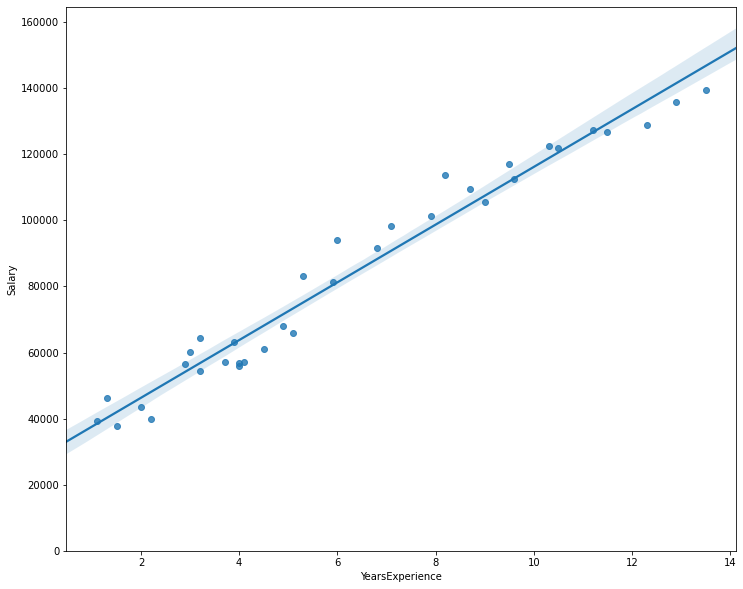

In [26]:
# Using Regression Plot

import matplotlib.pyplot as plt
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x = 'YearsExperience', y = 'Salary', data=df)
plt.ylim(0,)

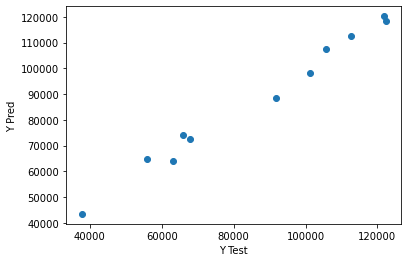

In [27]:
# PLOT OF PREDICTED VALUES VS ACTUAL VALUES
plt.scatter(y_test, Yhat)
plt.xlabel('Y Test')
plt.ylabel('Y Pred')
plt.show()

# Testing with new data

In [30]:
yearsExperience = np.array([5.6]).reshape(-1, 1)
pred = lm.predict(yearsExperience)
print("Number of Years of Experience", yearsExperience)
print("Predicted Salary", pred[0])

Number of Years of Experience [[5.6]]
Predicted Salary 78410.61556103299


In [31]:
### Evaluating the model
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, Yhat)
MSE

21950965.82414734